In [1]:
import pandas as pd
import prince
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Kategori_A': [30, 40, 30],
    'Kategori_B': [20, 50, 30],
    'Kategori_C': [50, 10, 40],
}
index = ['Grup_1', 'Grup_2', 'Grup_3']
df = pd.DataFrame(data, index=index)

In [3]:
print("Tabel Kontingensi:")
print(df)

Tabel Kontingensi:
        Kategori_A  Kategori_B  Kategori_C
Grup_1          30          20          50
Grup_2          40          50          10
Grup_3          30          30          40


In [4]:
ca = prince.CA(n_components=2)
ca = ca.fit(df)

In [5]:
print("\nSingular Values:")
print(ca.eigenvalues_)


Singular Values:
[0.13928203 0.00071797]


In [6]:
row_coords = ca.row_coordinates(df)
col_coords = ca.column_coordinates(df)

In [7]:
print("\nKoordinat Baris (Row Coordinates):")
print(row_coords)
print("\nKoordinat Kolom (Column Coordinates):")
print(col_coords)


Koordinat Baris (Row Coordinates):
               0         1
Grup_1 -0.373205 -0.026795
Grup_2  0.509808 -0.009808
Grup_3 -0.136603  0.036603

Koordinat Kolom (Column Coordinates):
                   0         1
Kategori_A  0.136603 -0.036603
Kategori_B  0.373205  0.026795
Kategori_C -0.509808  0.009808


In [8]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

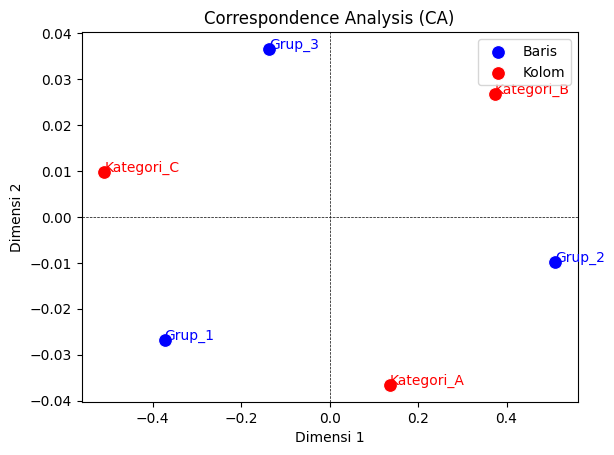

In [9]:
sns.scatterplot(x=row_coords[0], y=row_coords[1], label='Baris', color='blue', s=100)
for i, txt in enumerate(row_coords.index):
    plt.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], txt, color='blue')


sns.scatterplot(x=col_coords[0], y=col_coords[1], label='Kolom', color='red', s=100)
for i, txt in enumerate(col_coords.index):
    plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], txt, color='red')


plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Correspondence Analysis (CA)')
plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.legend()
plt.show()